In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pickle
import joblib
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input, Conv2D, MaxPooling2D
from tensorflow.keras import models, layers, Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.applications import vgg16

/kaggle/input/birdfrog-eda/test_labels.pkl
/kaggle/input/birdfrog-eda/train_features.pkl
/kaggle/input/birdfrog-eda/filename-noise.wav
/kaggle/input/birdfrog-eda/filename.wav
/kaggle/input/birdfrog-eda/__results__.html
/kaggle/input/birdfrog-eda/train_labels.pkl
/kaggle/input/birdfrog-eda/test_features.pkl
/kaggle/input/birdfrog-eda/train_noOS_labels.pkl
/kaggle/input/birdfrog-eda/train_noOS_features.pkl
/kaggle/input/birdfrog-eda/__notebook__.ipynb
/kaggle/input/birdfrog-eda/__output__.json
/kaggle/input/birdfrog-eda/custom.css
/kaggle/input/birdfrog-eda/__results___files/__results___15_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___10_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___24_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___36_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___21_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___46_0.png
/kaggle/input/birdfrog-eda/__results___files/__results___30_0.png
/ka

In [2]:
X_train = joblib.load('/kaggle/input/birdfrog-eda/train_features.pkl')
X_test = joblib.load('/kaggle/input/birdfrog-eda/test_features.pkl')
print(X_train.shape,X_test.shape)

(1226, 128, 1000, 3) (304, 128, 1000, 3)


In [3]:
y_train = np.array(joblib.load('/kaggle/input/birdfrog-eda/train_labels.pkl'))
y_test = np.array(joblib.load('/kaggle/input/birdfrog-eda/test_labels.pkl'))
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape,X_val.shape, y_val.shape)

(919, 128, 1000, 3) (919,) (304, 128, 1000, 3) (304,) (307, 128, 1000, 3) (307,)


# Distribution of species after augmentation (limited by RAM)

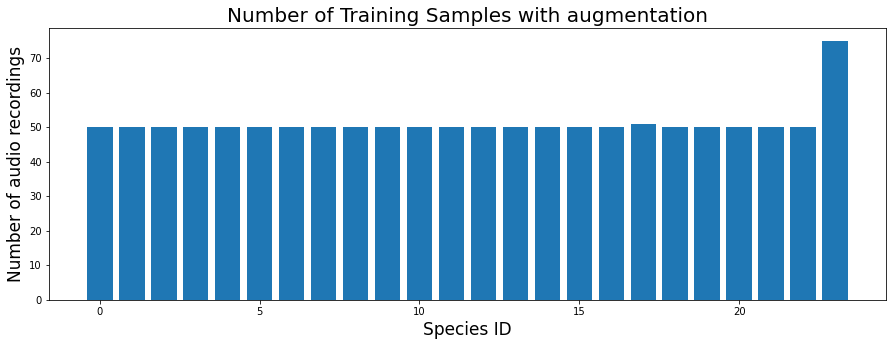

In [4]:
unique, counts = np.unique(np.concatenate((y_train,y_val)),return_counts=True)
values=dict(zip(unique,counts))
fig, ax = plt.subplots(figsize=(15,5))
barlist=plt.bar(values.keys(),values.values(), label='Minority samples')
plt.xlabel('Species ID', fontsize=17)
plt.ylabel('Number of audio recordings', fontsize=17)
plt.title('Number of Training Samples with augmentation', fontsize=20)
plt.show()

# CNN Modeling

In [5]:
input_shape=(128,1000,3)
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(64, activation='relu'))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(24, activation='softmax'))
CNNmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 998, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 499, 32)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 499, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 497, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 248, 64)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 248, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 246, 64)       3

In [6]:
CNNmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = CNNmodel.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_val, y_val))

Epoch 1/20
29/29 [==============================] - 8s 147ms/step - loss: 10.3036 - accuracy: 0.1275 - val_loss: 1.7395 - val_accuracy: 0.5570
Epoch 2/20
29/29 [==============================] - 3s 95ms/step - loss: 1.5394 - accuracy: 0.5962 - val_loss: 0.9814 - val_accuracy: 0.8306
Epoch 3/20
29/29 [==============================] - 3s 100ms/step - loss: 0.9738 - accuracy: 0.7398 - val_loss: 0.8063 - val_accuracy: 0.8404
Epoch 4/20
29/29 [==============================] - 3s 105ms/step - loss: 0.6533 - accuracy: 0.8216 - val_loss: 0.6913 - val_accuracy: 0.8534
Epoch 5/20
29/29 [==============================] - 3s 98ms/step - loss: 0.6278 - accuracy: 0.8250 - val_loss: 0.6587 - val_accuracy: 0.8697
Epoch 6/20
29/29 [==============================] - 3s 92ms/step - loss: 0.4711 - accuracy: 0.8479 - val_loss: 0.5572 - val_accuracy: 0.8730
Epoch 7/20
29/29 [==============================] - 3s 98ms/step - loss: 0.4654 - accuracy: 0.8751 - val_loss: 0.5014 - val_accuracy: 0.8762
Epoch 8/2

In [7]:
TrainLoss, Trainacc = CNNmodel.evaluate(X_train,y_train)
TestLoss, Testacc = CNNmodel.evaluate(X_test, y_test)
y_pred=CNNmodel.predict(X_test)
print('TrainLoss: %f, Train accuracy %f, TestLoss: %f, Test Accuracy: %f ' %(TrainLoss,Trainacc,TestLoss,Testacc))
print('Confusion_matrix: ',tf.math.confusion_matrix(y_test, np.argmax(y_pred,axis=1)))

10/10 [==============================] - 0s 45ms/step - loss: 0.1485 - accuracy: 0.9704
TrainLoss: 0.079032, Train accuracy 0.969532, TestLoss: 0.148479, Test Accuracy: 0.970395 
Confusion_matrix:  tf.Tensor(
[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0 

# Performance is similar between training and validation sets

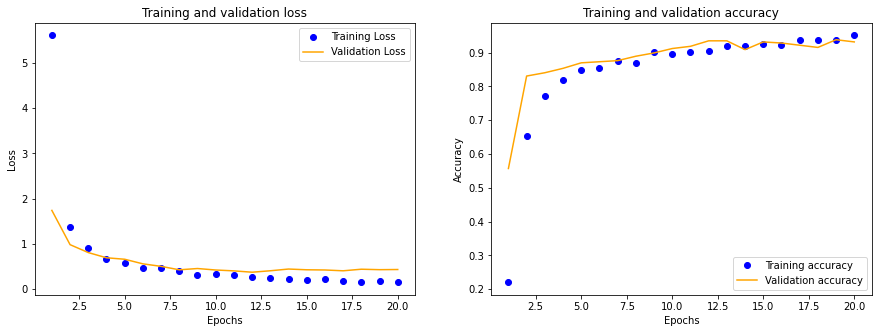

In [8]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,21)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()